Group Name: PBJ

Members:
1. Poulami Ghosh
2. Bramantyo Ibrahim Supriyatno
3. Julie Morgan

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ones = np.ones((1,3))
x = np.array([
    [-1,0.3,2]
])

X = np.concatenate((ones,x), axis=0)

In [3]:
y_true = np.array([
    [-0.1,0.5,0.5]
])

In [4]:
w_init = np.array([
    [-0.45],
    [0.2]
])

In [5]:
def q_hessian(X):
    return np.dot(X,X.T)

In [6]:
def q_grad(w, X, y_t, hessian):
    return np.dot(hessian,w) - np.dot(X,y_t.T)

# Gradient Descent

In [8]:
e_thr = 1e-6
tolerance=1e-6

In [9]:
w_gd = w_init.copy()

W_gd = [w_gd]

lr = 1e-1

hessian = q_hessian(X)

e_gd = 1

while e_gd > e_thr:
    err = lr * q_grad(w_gd, X, y_true, hessian)
    
    w_gd = w_gd - err
    W_gd.append(w_gd)
    e_gd = np.abs(err).mean() 
    
W_gd = np.array(W_gd).reshape(-1,2)

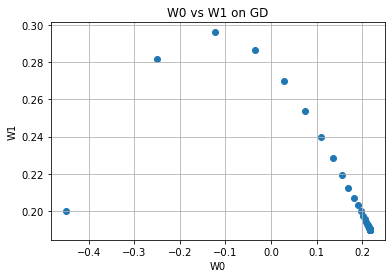

In [10]:
plt.scatter(W_gd[:,0],W_gd[:,1])
plt.title('W0 vs W1 on GD')
plt.xlabel('W0')
plt.ylabel('W1')
plt.grid()
plt.show()

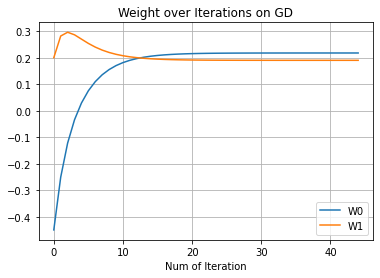

In [11]:
iter_num = np.linspace(0, W_gd.shape[0]-1,W_gd.shape[0])

plt.plot(iter_num, W_gd[:,0], label='W0')
plt.plot(iter_num, W_gd[:,1], label='W1')
plt.title('Weight over Iterations on GD')
plt.xlabel('Num of Iteration')
plt.legend()
plt.grid()
plt.show()

# Line Search

In [12]:
def compute_ls_lr(grad, hessian):
    lr = np.dot(grad.T, grad)/np.dot(np.dot(grad.T, hessian), grad)
    return lr

In [13]:
w_ls = w_init.copy()

W_ls = [w_ls]

hessian = q_hessian(X)
e_ls = 1

while e_ls > e_thr:
    grad = q_grad(w_ls, X, y_true, hessian)
    lr = compute_ls_lr(grad, hessian)  
    
    err = lr * grad
    
    w_ls = w_ls - err
    W_ls.append(w_ls)
    e_ls = np.abs(err).mean() 

W_ls = np.array(W_ls).reshape(-1,2)

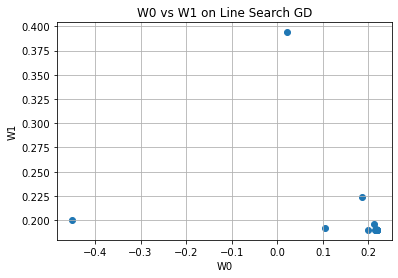

In [14]:
plt.scatter(W_ls[:,0],W_ls[:,1])
plt.title('W0 vs W1 on Line Search GD')
plt.xlabel('W0')
plt.ylabel('W1')
plt.grid()
plt.show()

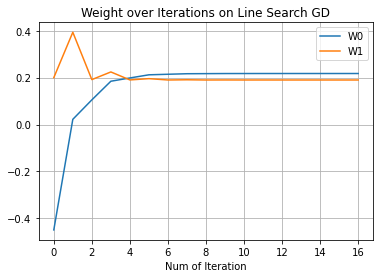

In [15]:
iter_num = np.linspace(0, W_ls.shape[0]-1,W_ls.shape[0])

plt.plot(iter_num, W_ls[:,0], label='W0')
plt.plot(iter_num, W_ls[:,1], label='W1')
plt.title('Weight over Iterations on Line Search GD')
plt.xlabel('Num of Iteration')
plt.legend()
plt.grid()
plt.show()

# Conjugate Gradient

In [16]:
def compute_conj_d(d, grad, grad_1):
    beta = -np.dot(grad_1.T, grad_1)/np.dot(grad.T, grad)
    return grad_1 + beta*d

In [17]:
def compute_cg_lr(d, grad, hessian):
    lr = -np.dot(d.T, grad)/np.dot(np.dot(d.T, hessian), d)
    return lr

In [18]:
w_cg = w_init.copy()

W_cg = [w_cg]

max_count = 5
e_cg = 1
hessian = q_hessian(X)
grad = q_grad(w_cg, X, y_true, hessian) 
count = max_count
d = -grad
while e_cg > e_thr:   
    
    lr = compute_cg_lr(d, grad, hessian)
    err = lr * d
    w_cg = w_cg + err      
    
    W_cg.append(w_cg)
    e_cg = np.abs(err).mean()   
    
    grad_1 = q_grad(w_cg, X, y_true, hessian)
    
    #sometimes grad goes to zero 
    if np.sqrt(np.dot(grad_1.T, grad_1))<tolerance:
        break
        
    if count == 0:
        d = -grad
        count=max_count
    else:
        d = compute_conj_d(d, grad, grad_1)
        count -=1
        
    grad = grad_1    
W_cg = np.array(W_cg).reshape(-1,2)

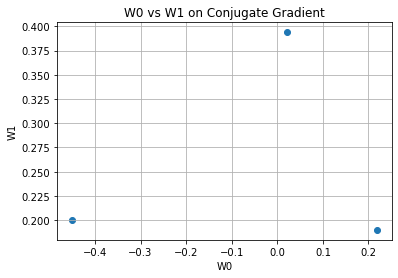

In [19]:
plt.scatter(W_cg[:,0],W_cg[:,1])
plt.title('W0 vs W1 on Conjugate Gradient')
plt.xlabel('W0')
plt.ylabel('W1')
plt.grid()
plt.show()

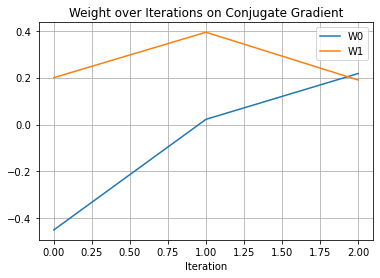

In [20]:
iter_num = np.linspace(0, W_cg.shape[0]-1,W_cg.shape[0])

plt.plot(iter_num, W_cg[:,0], label='W0')
plt.plot(iter_num, W_cg[:,1], label='W1')
plt.title('Weight over Iterations on Conjugate Gradient')
plt.xlabel('Iteration')
plt.legend()
plt.grid()
plt.show()

<b>Discussion</b>

Comparing the number of iteration for all the methods, clearly conjugate gradient converges fastest. 

Regarding the direction of updates, the gradient descent method changes the update direction gradually depending on how large the learnign rate is. On the other hand, the line search and conjugate gradient method seem to change the direction in a faster manner. The line search, for example, changes the gradient rapidly on the first iteration and goes smothly afterwards. 